#Data Exploration

#Importing libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from IPython.display import display
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
import matplotlib.pyplot as plt
import warnings
plt.rcParams['figure.figsize'] = [10,6]
warnings.filterwarnings('ignore')

#importing the dataset

In [4]:
#df = pd.read_csv('/content/Advertising Budget and Sales.csv') ## displays whole table, some of the content may not be necessary so,

df = pd.read_csv('/content/Advertising Budget and Sales.csv', index_col=0, names=['TV','Radio','Newspaper','Sales'], skiprows=1)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
target = 'Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)
print(' The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))
#df.shape[1] -> defines no of columns
#df.shape[0] -> defines no of rows

 The Datset consists of 4 features & 200 samples.


checking the datatypes of all the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


checking number of unique rows in each feature

In [7]:
df.nunique().sort_values()

Sales        121
Radio        167
Newspaper    172
TV           190
dtype: int64

checking number of unique rows in each feature

In [8]:
nu = df[features].nunique().sort_values()
#numerical & categorical feature
nf=[]
cf=[]
nnf=0
ncf=0

In [9]:
for i in range(df[features].shape[1]):
  if nu.values[i]<=16:
    cf.append(nu.index[i])
  else:
    nf.append(nu.index[i])

print('The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

The Datset has 3 numerical & 0 categorical features.


#Exploritory Data Analysis(EDA)

at first let us analyze the distribution of the target variable

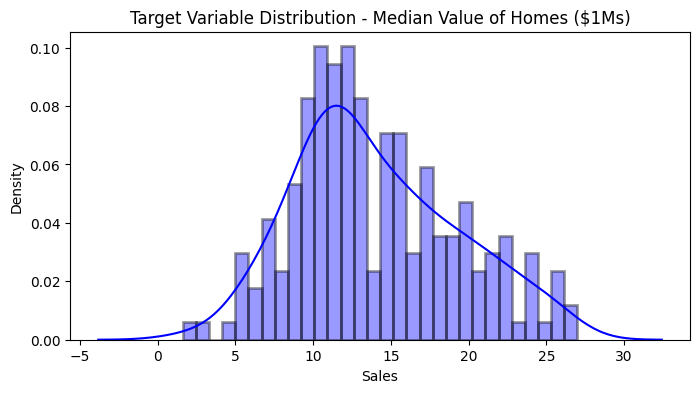

In [10]:
plt.figure(figsize=[8,4])
sns.distplot(df[target],color='blue', hist_kws=dict(edgecolor='black',linewidth=2),bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

Here Target Value Distribution to Median value of Homes seems to be normally distributed, averaging around $12 units.

#* Visualising the categorical features


In [11]:
n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
  if df[cf[i]].nunique()<=8:
    plt.subplot(math.ceil(len(cf)/n),n,i+1)
    sns.countplot(df[cf[i]])
  else:
    plt.subplot(3,1,i-3)
    sns.countplot(df[cf[i]])

plt.tight_layout()
plt.show()

<Figure size 1500x0 with 0 Axes>

There are no categorical features in the dataset

#* Visualising the neumeric feature

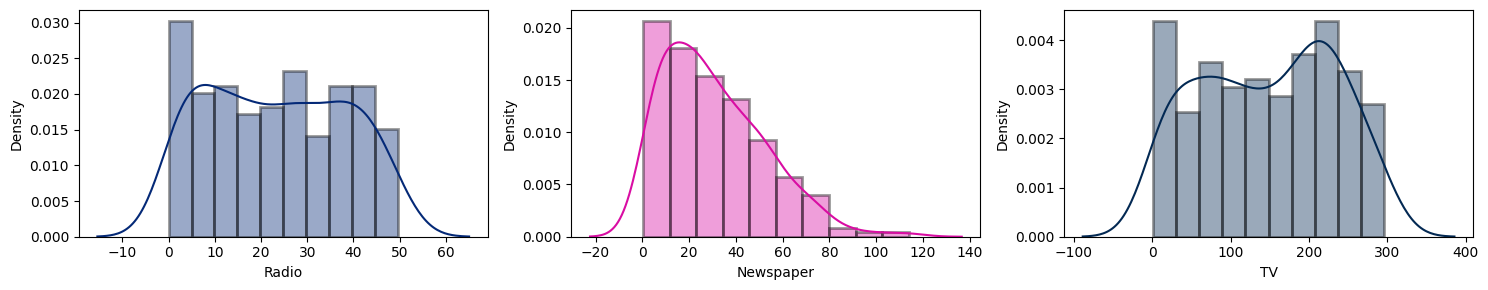

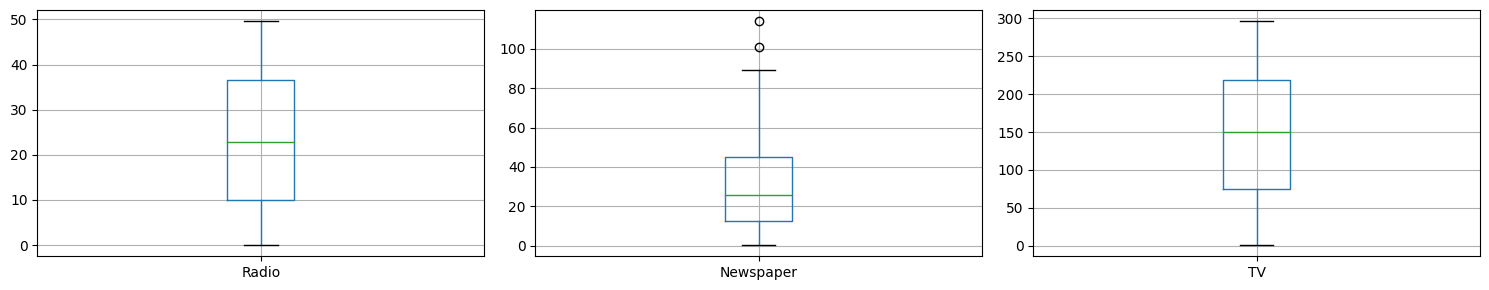

In [12]:
#neumeric feature distribution
n=3

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

There seem to be some outliers in Newspaper Distribution.

Understanding the relationship between all the features

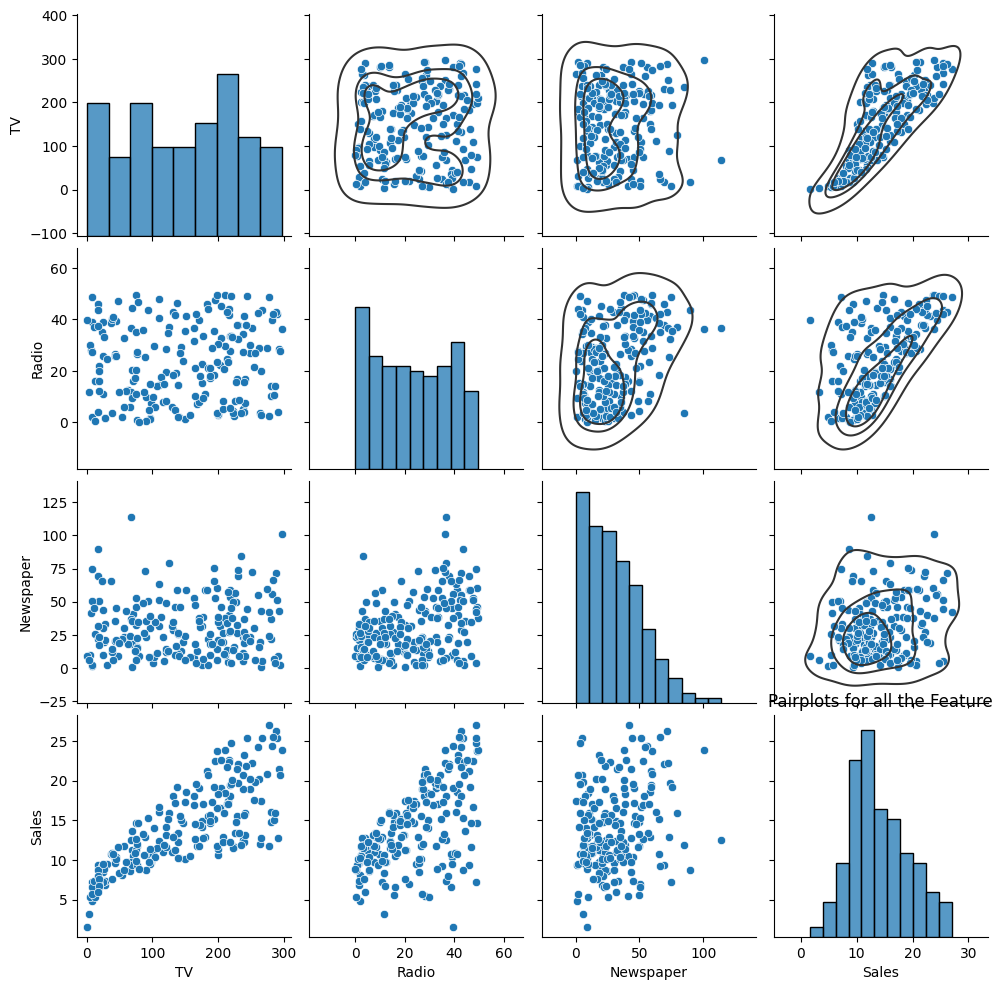

In [13]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

Here We can notice that some features have linear relationship.

#Data Preprocessing


#* Removal of any Duplicate rows (if any)


In [14]:
counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('The dataset doesn\'t have any duplicates')
else:
    print(f'Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')

The dataset doesn't have any duplicates


#* Check for empty elements


In [15]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total no of Null Values'])
nvc['Percentage'] = round(nvc['Total no of Null Values']/df.shape[0],3)*100
print(nvc)

           Total no of Null Values  Percentage
TV                               0         0.0
Radio                            0         0.0
Newspaper                        0         0.0
Sales                            0         0.0


The datset doesn't have any inconsistant values.

# * Removal of Outliers

In [16]:
df1 = df.copy()
df3 = df1.copy()
df1 = df3.copy()

features1 = nf
for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())

print('\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



Before removal of outliers, The dataset had 200 samples.
After removal of outliers, The dataset now has 198 samples.


Final Dataset size after performing Preprocessing

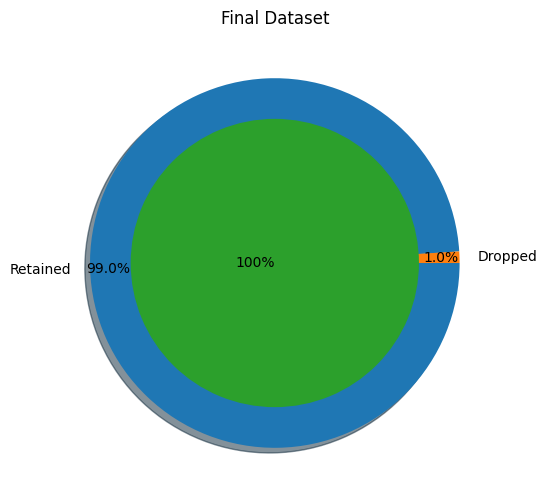

After the cleanup process, 2 samples were dropped, while retaining 1.0% of the data.


In [17]:
df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

#Data Manupulation

Splitting the data into training & testing sets


In [18]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (198, 3) (198,) 
Training set  --->  (158, 3) (158,) 
Testing set   --->  (40, 3)  (40,)


Feature Scaling (Standardization)

In [19]:
std = StandardScaler()

print('Standardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

                                           Standardardization on Training set                                           


,TV,Radio,Newspaper
count,1.580000e+02,1.580000e+02,1.580000e+02
mean,1.292918e-16,-1.405346e-16,-1.264811e-17
std,1.003180e+00,1.003180e+00,1.003180e+00
min,-1.662355e+00,-1.503915e+00,-1.518214e+00
25%,-8.650507e-01,-8.896291e-01,-7.818344e-01
50%,-4.306958e-02,-6.888944e-02,-2.049415e-01
75%,8.793825e-01,8.381548e-01,6.846946e-01
max,1.693726e+00,1.833196e+00,2.892587e+00


In [20]:
print('Standardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                           Standardardization on Testing set                                            


,TV,Radio,Newspaper
count,40.000000,40.000000,40.000000
mean,-0.120802,0.205424,-0.390968
std,1.014382,1.013117,1.033937
min,-1.739911,-1.524222,-1.548118
25%,-0.998424,-0.739019,-1.168091
50%,0.192538,0.140949,-0.740717
75%,0.690192,1.120760,0.196267
max,1.701951,1.792582,2.384224


#Feature Selection/Extraction


Checking the correlation

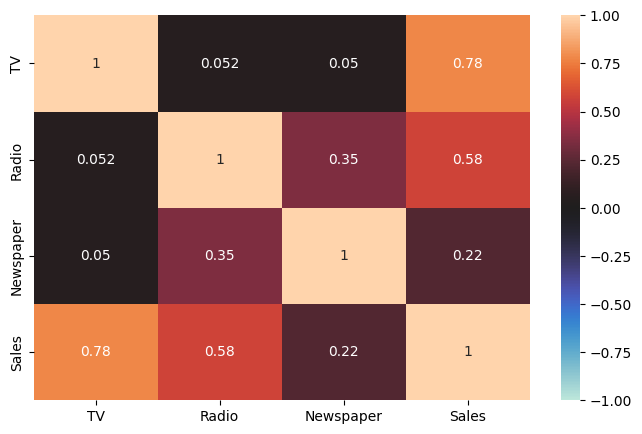

                   Correlation Matrix                  


In [21]:
plt.figure(figsize=[8,5])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()
print('Correlation Matrix'.center(55))

There seems to be strong multi-correlation between the features.
We now fix these

Testing a Linear Regression model with statsmodels

In [22]:
Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     487.1
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           2.39e-78
Time:                        05:24:29   Log-Likelihood:                -293.76
No. Observations:                 158   AIC:                             595.5
Df Residuals:                     154   BIC:                             607.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0006      0.125    111.865      0.000      13.753      14.248
TV             3.6964      0.125     29.502      0.000       3.449       3.944
Radio          2.9466      0.138     21.365      0.000       2.674       3.219
Newspaper     -0.1928      0.138     -1.400      0.164      -0.465       0.079
==============================================================================
Omnibus:                       17.449   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.654
Skew:                          -0.827   Prob(JB):                     5.40e-05
Kurtosis:                       3.498   Cond. No.                         1.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Approach**: We approach to fix these multicollinearity with following techniques:

Manual Method - Variance Inflation Factor (VIF)

Automatic Method - Recursive Feature Elimination (RFE)

Feature Elmination using PCA Decomposition

#Variance Inflation Factor

In [23]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

In [24]:
DROP=[];b=[]

In [25]:
for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))

        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

In [26]:
print('Dropped Features --> ',DROP)

Dropped Features -->  ['Radio']


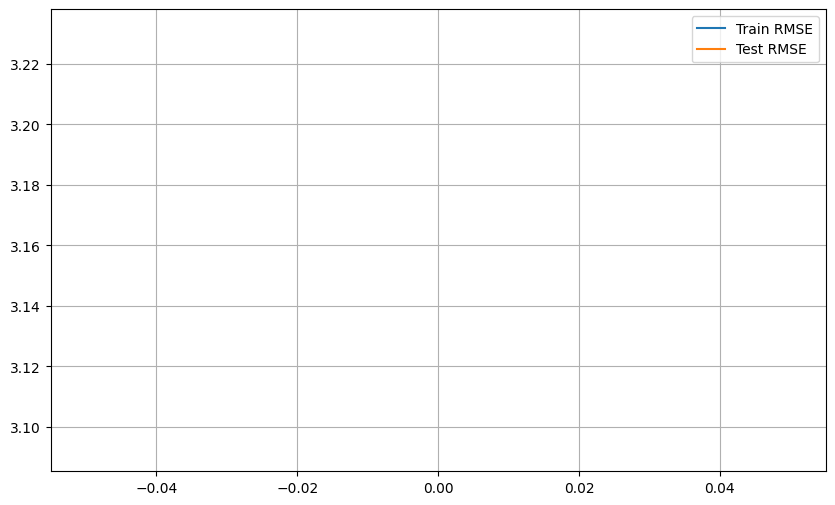

In [27]:
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

#Recursive Feature Elimination

In [28]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)


In [29]:
m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

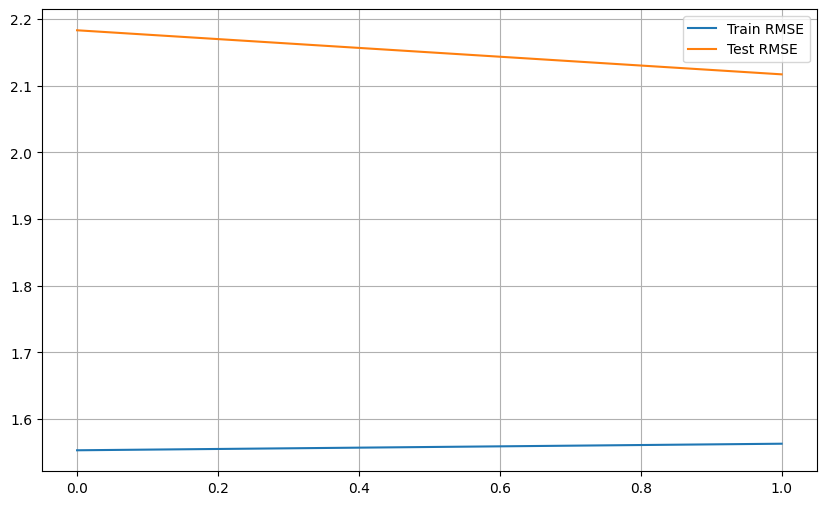

In [30]:
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

#PCA Decomposition

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA().fit(Train_X_std)

<BarContainer object of 3 artists>

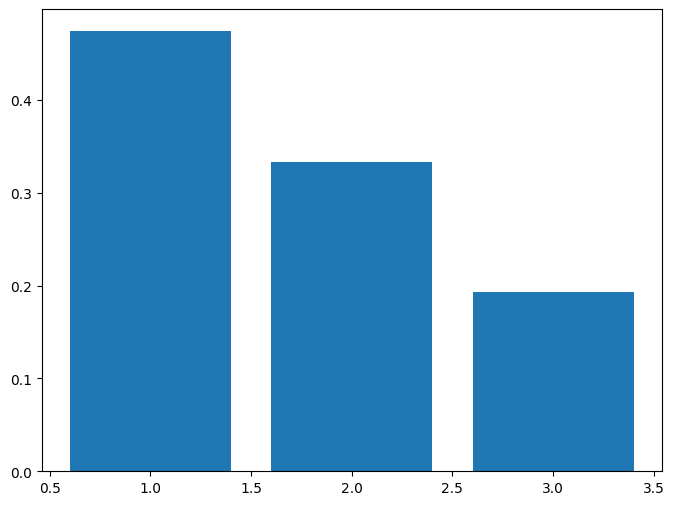

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')


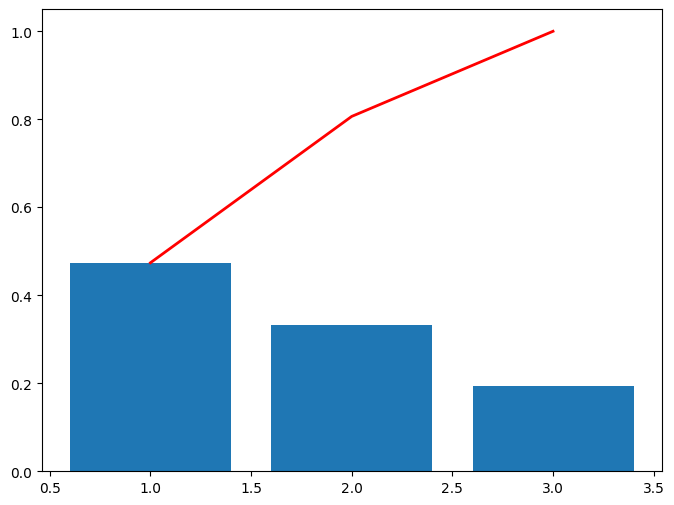

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')

ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')

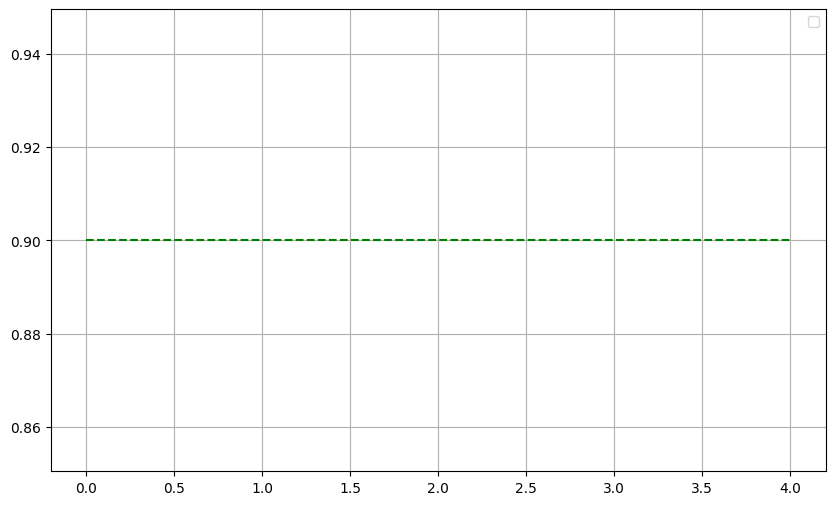

In [35]:
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()


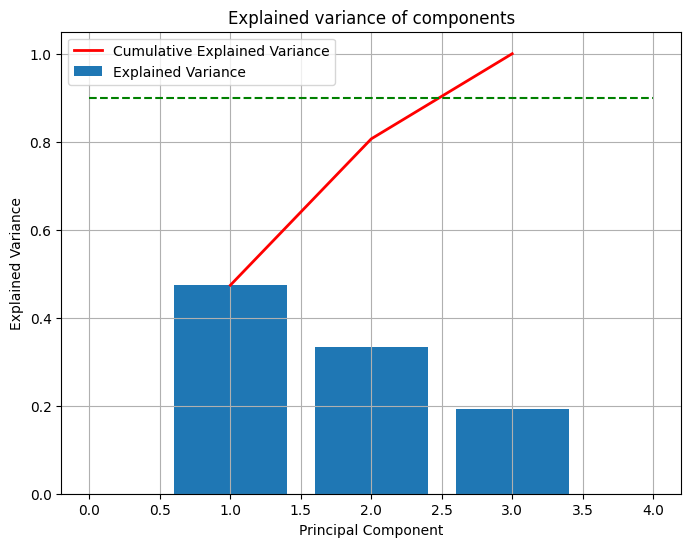

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

In [38]:
for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)

    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

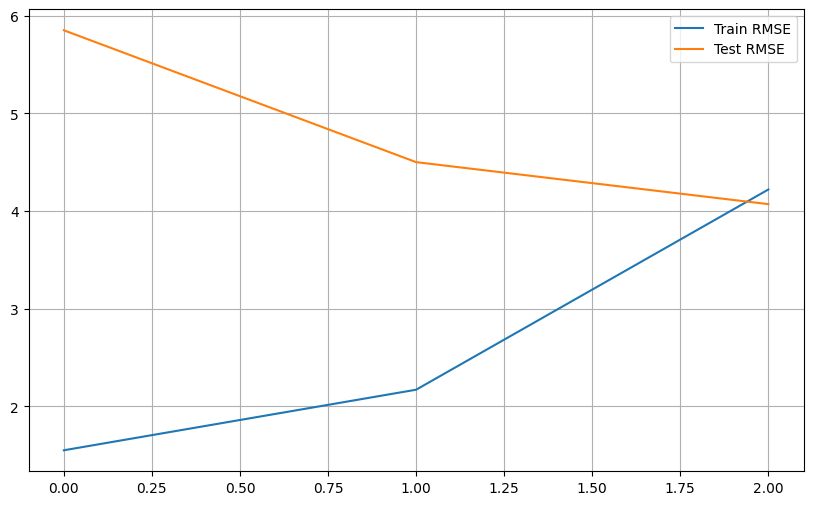

In [39]:
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

It can be seen that the performance of the modelsis quiet comparable upon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most features using manual RFE Technique.

# Predictive Modelling

In [40]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2',
                                                                            'Test-R2','Train-RSS',
                                                                            'Test-RSS','Train-MSE',
                                                                            'Test-MSE','Train-RMSE',
                                                                            'Test-RMSE'])

In [41]:
rc=np.random.choice(Train_X_std.columns,2)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()


We now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets

#Multiple Linear Regression(MLR)

Linear Regression


In [42]:
MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)


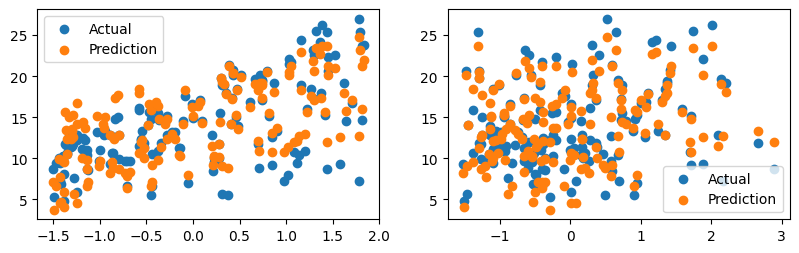



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9046635059559758
Residual Sum of Squares (RSS) on Training set  ---> 381.14099667994697
Mean Squared Error (MSE) on Training set       ---> 2.4122847891135883
Root Mean Squared Error (RMSE) on Training set ---> 1.5531531763202198

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8556177767066229
Residual Sum of Squares (RSS) on Training set  ---> 190.68989767470617
Mean Squared Error (MSE) on Training set       ---> 4.767247441867654
Root Mean Squared Error (RMSE) on Training set ---> 2.183402720953616

--------------------Residual Plots--------------------


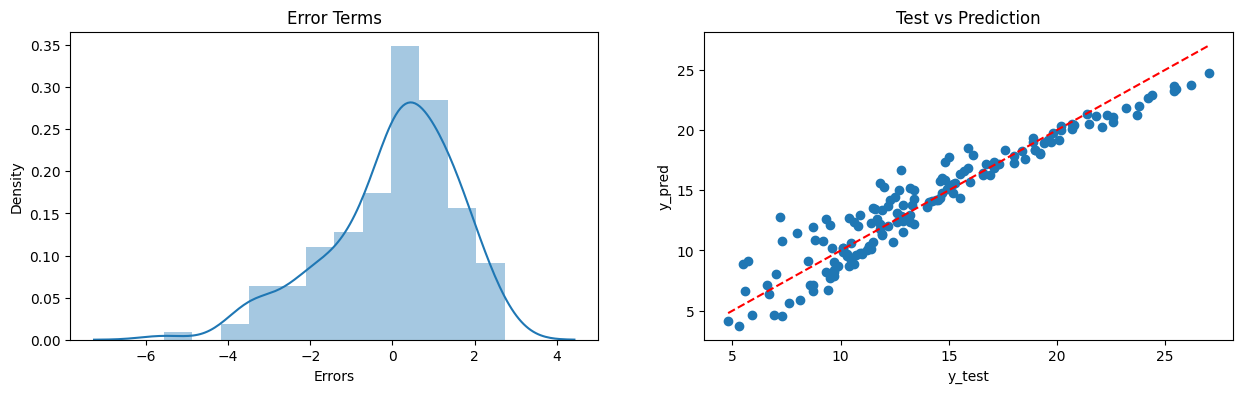

Evaluating Multiple Linear Regression Model
The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


In [43]:
Evaluate(0, pred1, pred2)
print('Evaluating Multiple Linear Regression Model'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

#Ridge Regression Model

Evaluating Ridge Regression Model 
The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


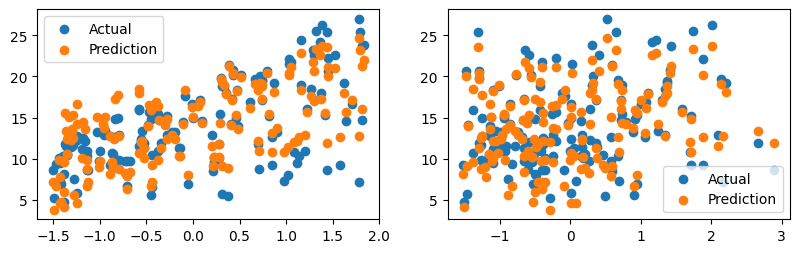



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9046264664952751
Residual Sum of Squares (RSS) on Training set  ---> 381.2890748855642
Mean Squared Error (MSE) on Training set       ---> 2.413221992946609
Root Mean Squared Error (RMSE) on Training set ---> 1.5534548570675006

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8553280806292756
Residual Sum of Squares (RSS) on Training set  ---> 191.07250790251712
Mean Squared Error (MSE) on Training set       ---> 4.776812697562927
Root Mean Squared Error (RMSE) on Training set ---> 2.185592070255318

--------------------Residual Plots--------------------


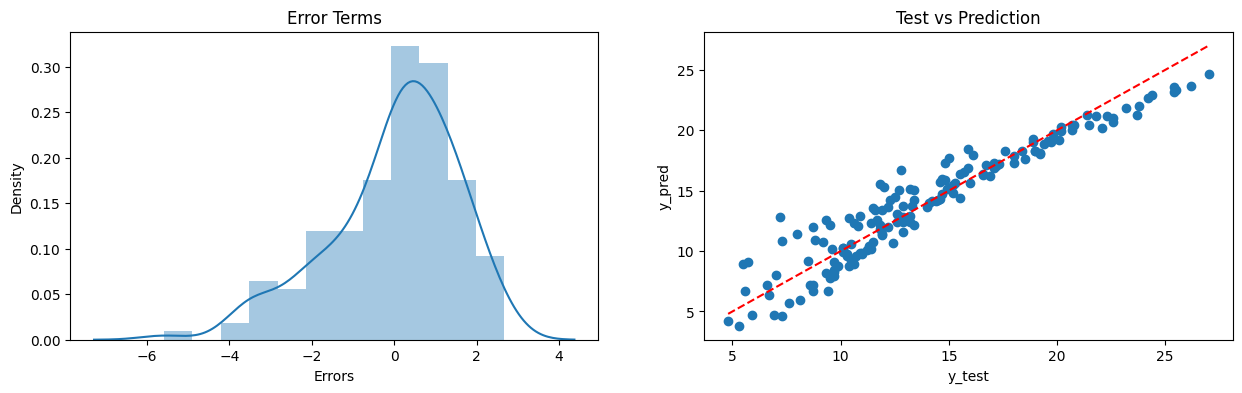

In [44]:
RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('Evaluating Ridge Regression Model '.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

#Lasso Regression Model

In [45]:
LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

In [46]:
print('Evaluating Lasso Regression Model '.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluating Lasso Regression Model 
The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


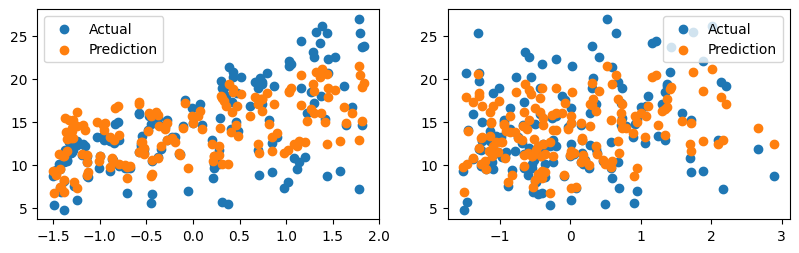



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8278673741198022
Residual Sum of Squares (RSS) on Training set  ---> 688.1604074806787
Mean Squared Error (MSE) on Training set       ---> 4.355445616966321
Root Mean Squared Error (RMSE) on Training set ---> 2.086970439888002

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.7730203619051653
Residual Sum of Squares (RSS) on Training set  ---> 299.7787606760816
Mean Squared Error (MSE) on Training set       ---> 7.49446901690204
Root Mean Squared Error (RMSE) on Training set ---> 2.7376027865455645

--------------------Residual Plots--------------------


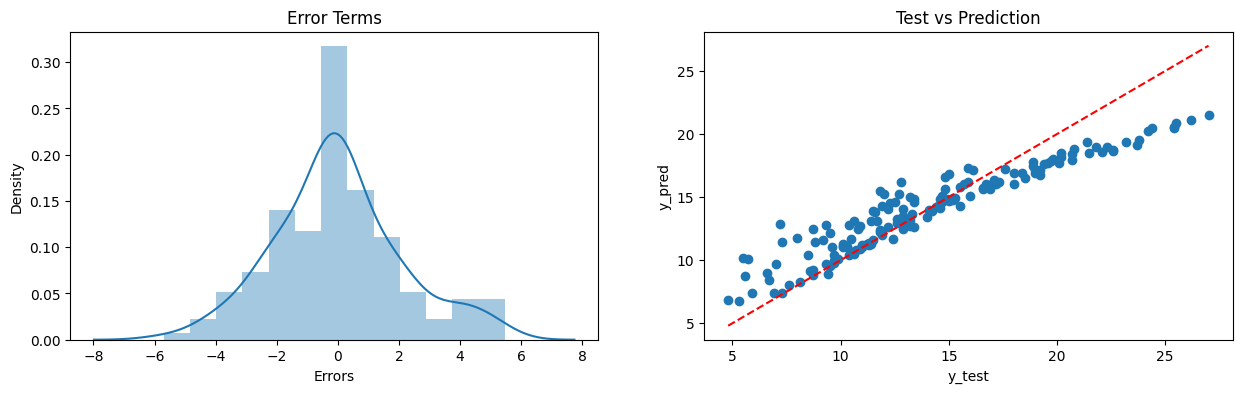

In [47]:
Evaluate(2, pred1, pred2)

#ElasticNet Regression model

Evaluating Elastic-Net Regression Model
The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


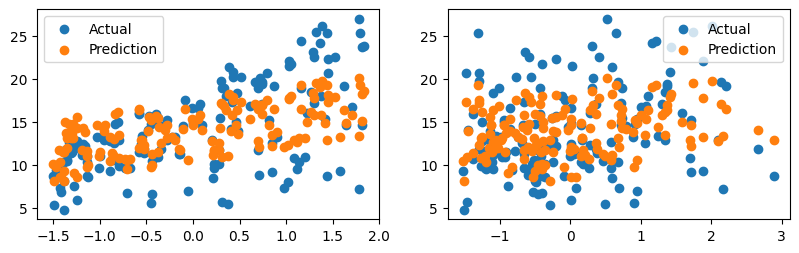



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7433268395138777
Residual Sum of Squares (RSS) on Training set  ---> 1026.1407784043072
Mean Squared Error (MSE) on Training set       ---> 6.4945618886348555
Root Mean Squared Error (RMSE) on Training set ---> 2.548443032252213

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6800469571269883
Residual Sum of Squares (RSS) on Training set  ---> 422.5715023254121
Mean Squared Error (MSE) on Training set       ---> 10.564287558135302
Root Mean Squared Error (RMSE) on Training set ---> 3.250274997309505

--------------------Residual Plots--------------------


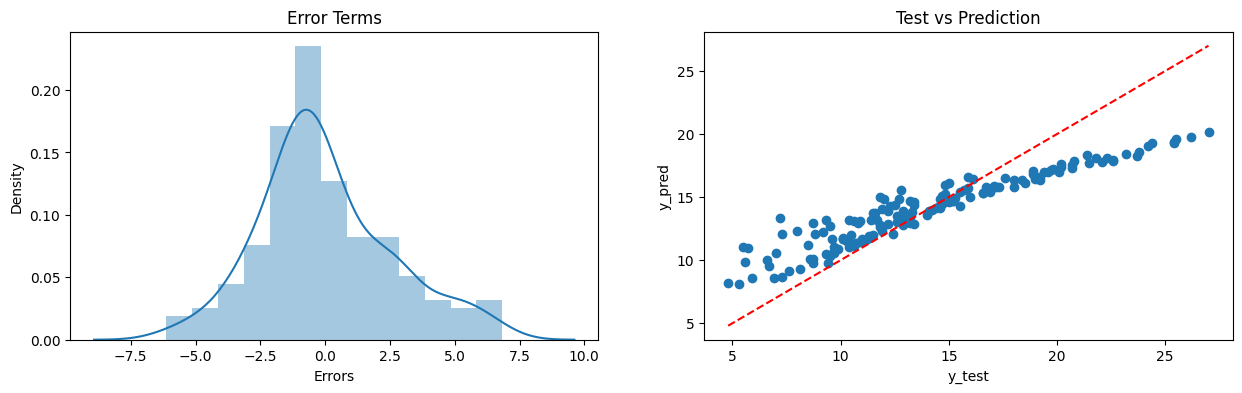

In [48]:


ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('Evaluating Elastic-Net Regression Model'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

#Polynomial Regression Model

In [49]:
Trr=[]; Tss=[]
n_degree=6

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)

    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))

    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

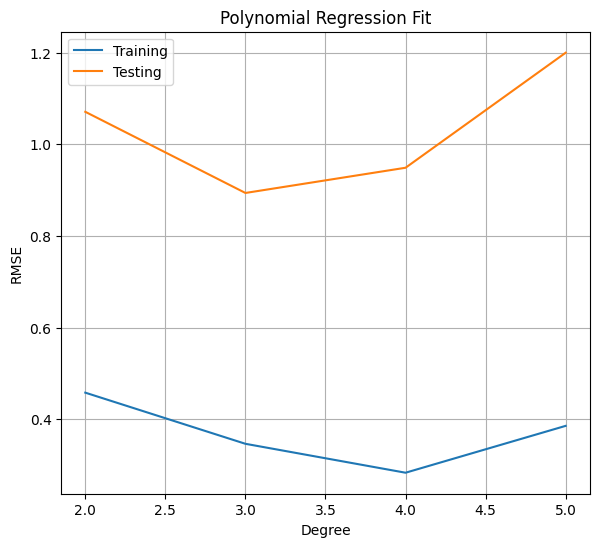

In [50]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()

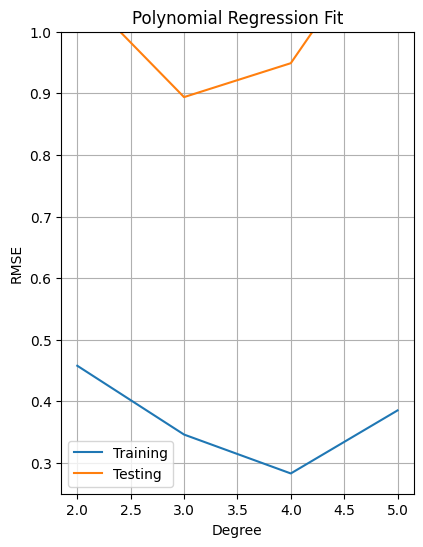

In [51]:
plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0.25,1])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
plt.show()


We can choose 2nd order polynomial regression as it gives the optimal training & testing scores

Using the 2rd Order Polynomial Regression model

In [52]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

LinearRegression()

In [53]:
pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

Evaluating Polynomial Regression Model
The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


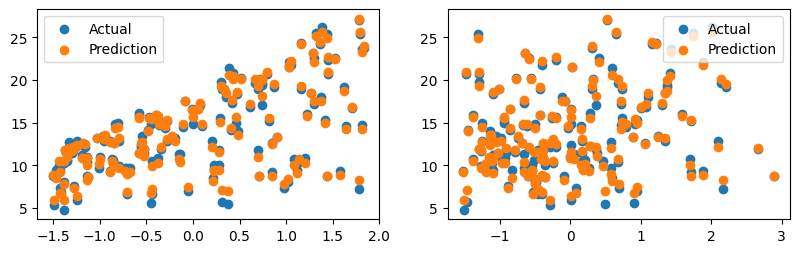



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9917189130237828
Residual Sum of Squares (RSS) on Training set  ---> 33.106543043751074
Mean Squared Error (MSE) on Training set       ---> 0.20953508255538655
Root Mean Squared Error (RMSE) on Training set ---> 0.45775002190648395

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9652533223582987
Residual Sum of Squares (RSS) on Training set  ---> 45.89097087505486
Mean Squared Error (MSE) on Training set       ---> 1.1472742718763715
Root Mean Squared Error (RMSE) on Training set ---> 1.0711088982341486

--------------------Residual Plots--------------------


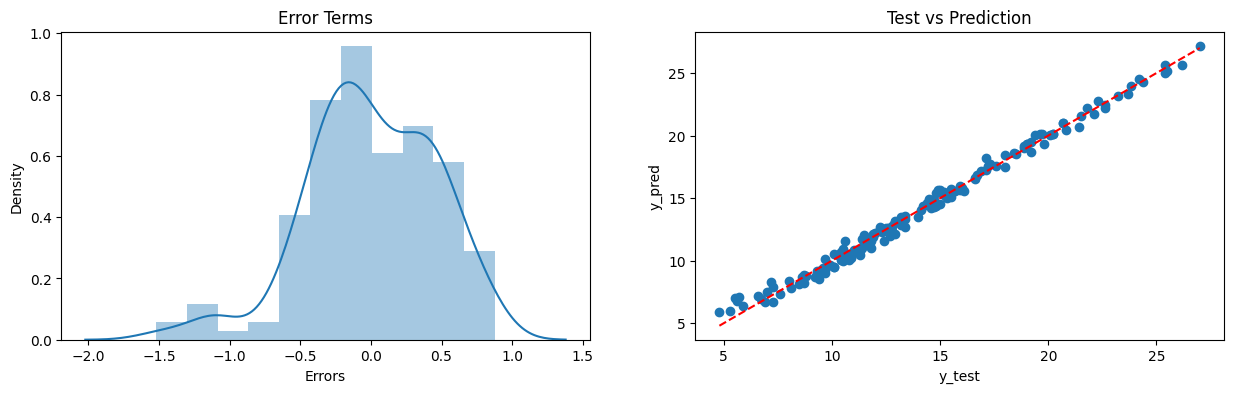

In [54]:
print('Evaluating Polynomial Regression Model'.format('<'*3,'-'*20,'-'*20,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)
Evaluate(4, pred1, pred2)

Comparing the Evaluation Metics of the Models

In [55]:
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)',
             'Ridge Linear Regression (RLR)',
             'Lasso Linear Regression (LLR)',
             'Elastic-Net Regression (ENR)',
             'Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.904664,0.855618,381.140997,190.689898,2.412285,4.767247,1.553153,2.183403
Ridge Linear Regression (RLR),0.904626,0.855328,381.289075,191.072508,2.413222,4.776813,1.553455,2.185592
Lasso Linear Regression (LLR),0.827867,0.773020,688.160407,299.778761,4.355446,7.494469,2.086970,2.737603
Elastic-Net Regression (ENR),0.743327,0.680047,1026.140778,422.571502,6.494562,10.564288,2.548443,3.250275
Polynomial Regression (PNR),0.991719,0.965253,33.106543,45.890971,0.209535,1.147274,0.457750,1.071109


R2-Scores Comparison for different Regression Models


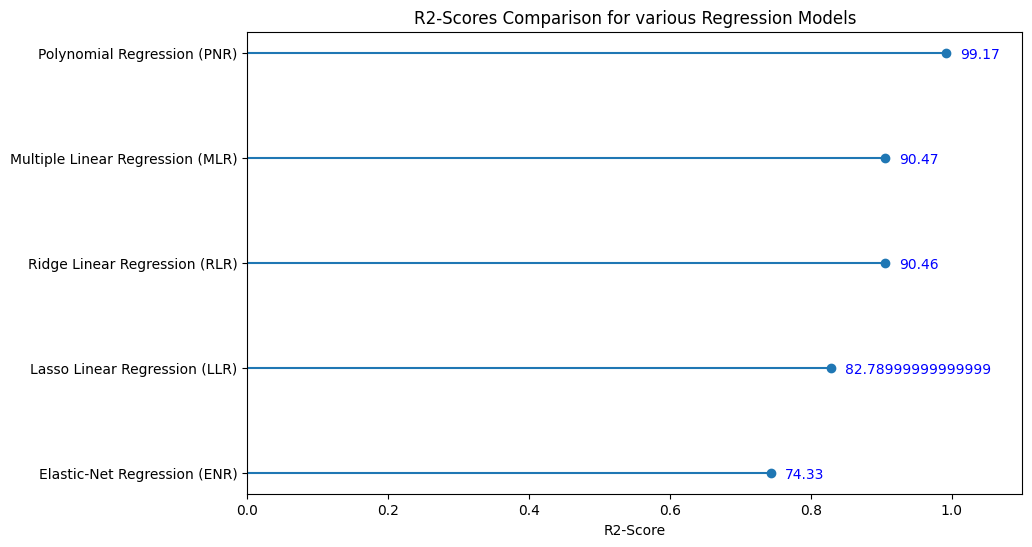

In [56]:
R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

From the above plot, it is clear that the polynomial regresion models have the highest explainability power to understand the dataset.

Root Mean SquaredError Comparison for different Regression Models


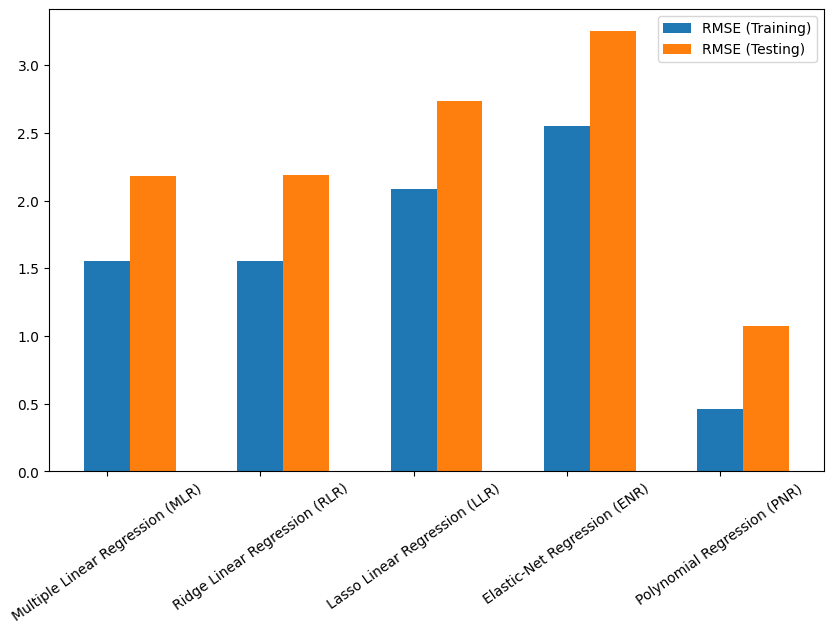

In [57]:
cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.show()


Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions are the best choice to go with.

#Outcomes & Conclusions

* The Dataset was quiet small with just 200 samples & after preprocessing 1% of the datasamples were dropped.
* Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
* The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
* Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
* While, Polynomial Regression (Order-2) was the best choise, yet it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable.